In [2]:
import pandas as pd
import pickle
import numpy as np

In [3]:
df=pd.read_csv('T20 International Dataset.csv')

In [4]:
df.head()


,Unnamed: 0,powerPlay,balls,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,29,1,4.4,159.2,West Indies,India,Lauderhill,92,28,6.000000,7,28.0,3.0,95,1
1,30,1,4.5,159.2,West Indies,India,Lauderhill,91,28,5.793103,6,28.0,4.0,95,1
2,31,1,4.6,159.2,West Indies,India,Lauderhill,90,28,5.600000,6,28.0,3.0,95,1
3,32,1,5.1,159.2,West Indies,India,Lauderhill,89,28,5.419355,6,28.0,3.0,95,1
4,33,1,5.2,159.2,West Indies,India,Lauderhill,88,29,5.437500,6,28.0,3.0,95,1


In [5]:
df.shape

(131624, 15)

In [6]:
df.rename( columns={'Unnamed: 0':'ID'}, inplace=True )

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131624 entries, 0 to 131623
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                131624 non-null  int64  
 1   powerPlay         131624 non-null  int64  
 2   balls             131624 non-null  float64
 3   AverageScore      131624 non-null  float64
 4   battingTeam       131624 non-null  object 
 5   bowlingTeam       131624 non-null  object 
 6   city              131624 non-null  object 
 7   delivery_left     131624 non-null  int64  
 8   score             131624 non-null  int64  
 9   CurrentRunRate    131624 non-null  float64
 10  wicketsLeft       131624 non-null  int64  
 11  Run_In_Last5      131624 non-null  float64
 12  Wickets_In_Last5  131624 non-null  float64
 13  Final_Score       131624 non-null  int64  
 14  innings           131624 non-null  int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 15.1+ MB


In [8]:
# Removing the unwanted columns
df.drop(['powerPlay','city','innings','delivery_left','ID','AverageScore','CurrentRunRate'] , axis=1, inplace=True)
df.head()

,balls,battingTeam,bowlingTeam,score,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score
0,4.4,West Indies,India,28,7,28.0,3.0,95
1,4.5,West Indies,India,28,6,28.0,4.0,95
2,4.6,West Indies,India,28,6,28.0,3.0,95
3,5.1,West Indies,India,28,6,28.0,3.0,95
4,5.2,West Indies,India,29,6,28.0,3.0,95


In [9]:
df['wickets']=10-df['wicketsLeft']

In [10]:
# Removing the unwanted columns
df.drop(['wicketsLeft'] , axis=1, inplace=True)
df.head()

,balls,battingTeam,bowlingTeam,score,Run_In_Last5,Wickets_In_Last5,Final_Score,wickets
0,4.4,West Indies,India,28,28.0,3.0,95,3
1,4.5,West Indies,India,28,28.0,4.0,95,4
2,4.6,West Indies,India,28,28.0,3.0,95,4
3,5.1,West Indies,India,28,28.0,3.0,95,4
4,5.2,West Indies,India,29,28.0,3.0,95,4


In [11]:
df.columns

Index(['balls', 'battingTeam', 'bowlingTeam', 'score', 'Run_In_Last5',
       'Wickets_In_Last5', 'Final_Score', 'wickets'],
      dtype='object')

In [12]:
df['Battingteam']=df['battingTeam']
df['Bowlingteam']=df['bowlingTeam']
df['Currentscore']=df['score']
df['overs']=df['balls']
df['Wickets']=df['wickets']
df['RunsinLast_5']=df['Run_In_Last5']
df['WicketsinLast_5']=df['Wickets_In_Last5']
df['FinalScore']=df['Final_Score']
df.head()

,balls,battingTeam,bowlingTeam,score,Run_In_Last5,Wickets_In_Last5,Final_Score,wickets,Battingteam,Bowlingteam,Currentscore,overs,Wickets,RunsinLast_5,WicketsinLast_5,FinalScore
0,4.4,West Indies,India,28,28.0,3.0,95,3,West Indies,India,28,4.4,3,28.0,3.0,95
1,4.5,West Indies,India,28,28.0,4.0,95,4,West Indies,India,28,4.5,4,28.0,4.0,95
2,4.6,West Indies,India,28,28.0,3.0,95,4,West Indies,India,28,4.6,4,28.0,3.0,95
3,5.1,West Indies,India,28,28.0,3.0,95,4,West Indies,India,28,5.1,4,28.0,3.0,95
4,5.2,West Indies,India,29,28.0,3.0,95,4,West Indies,India,29,5.2,4,28.0,3.0,95


In [13]:
# Removing the unwanted columns
df.drop(['balls','battingTeam','bowlingTeam','score','Run_In_Last5','Wickets_In_Last5','Final_Score','wickets'] , axis=1, inplace=True)
df.head()

,Battingteam,Bowlingteam,Currentscore,overs,Wickets,RunsinLast_5,WicketsinLast_5,FinalScore
0,West Indies,India,28,4.4,3,28.0,3.0,95
1,West Indies,India,28,4.5,4,28.0,4.0,95
2,West Indies,India,28,4.6,4,28.0,3.0,95
3,West Indies,India,28,5.1,4,28.0,3.0,95
4,West Indies,India,29,5.2,4,28.0,3.0,95


<AxesSubplot: >

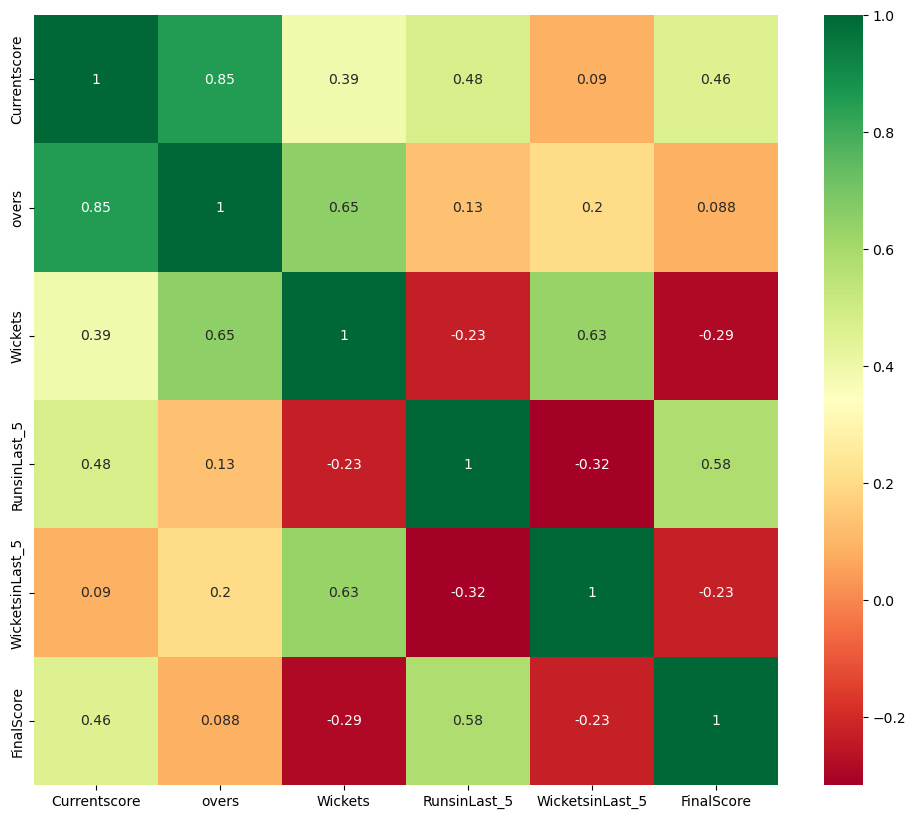

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
# Correlation of each of the feature
df1=df.select_dtypes(include=np.number)
corrmat = df1.corr()
plt.figure(figsize=(12,10))
# plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [15]:
# Considering only consistent teams
consistent_teams = ['India','Pakistan','South Africa','West Indies','Australia','New Zealand','England','Sri Lanka']
df = df[(df['Battingteam'].isin(consistent_teams)) & (df['Bowlingteam'].isin(consistent_teams))]

In [16]:
# Converting categorical features using OneHotEncoding method
Dummies = pd.get_dummies(df[['Battingteam', 'Bowlingteam']])
df.drop(['Battingteam','Bowlingteam'],axis=1 , inplace=True)
df = pd.concat([df, Dummies], axis = 1)

In [17]:
df.columns

Index(['Currentscore', 'overs', 'Wickets', 'RunsinLast_5', 'WicketsinLast_5',
       'FinalScore', 'Battingteam_Australia', 'Battingteam_England',
       'Battingteam_India', 'Battingteam_New Zealand', 'Battingteam_Pakistan',
       'Battingteam_South Africa', 'Battingteam_Sri Lanka',
       'Battingteam_West Indies', 'Bowlingteam_Australia',
       'Bowlingteam_England', 'Bowlingteam_India', 'Bowlingteam_New Zealand',
       'Bowlingteam_Pakistan', 'Bowlingteam_South Africa',
       'Bowlingteam_Sri Lanka', 'Bowlingteam_West Indies'],
      dtype='object')

In [18]:
df[['Battingteam_Australia', 'Battingteam_England',
       'Battingteam_India', 'Battingteam_New Zealand', 'Battingteam_Pakistan',
       'Battingteam_South Africa', 'Battingteam_Sri Lanka',
       'Battingteam_West Indies', 'Bowlingteam_Australia',
       'Bowlingteam_England', 'Bowlingteam_India', 'Bowlingteam_New Zealand',
       'Bowlingteam_Pakistan', 'Bowlingteam_South Africa',
       'Bowlingteam_Sri Lanka', 'Bowlingteam_West Indies','Currentscore', 'overs', 'Wickets', 'RunsinLast_5', 'WicketsinLast_5',
       'FinalScore']]

,Battingteam_Australia,Battingteam_England,Battingteam_India,Battingteam_New Zealand,Battingteam_Pakistan,Battingteam_South Africa,Battingteam_Sri Lanka,Battingteam_West Indies,Bowlingteam_Australia,Bowlingteam_England,...,Bowlingteam_Pakistan,Bowlingteam_South Africa,Bowlingteam_Sri Lanka,Bowlingteam_West Indies,Currentscore,overs,Wickets,RunsinLast_5,WicketsinLast_5,FinalScore
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,28,4.4,3,28.0,3.0,95
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,28,4.5,4,28.0,4.0,95
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,28,4.6,4,28.0,3.0,95
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,28,5.1,4,28.0,3.0,95
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,29,5.2,4,28.0,3.0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131526,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,165,19.2,5,32.0,3.0,171
131527,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,166,19.3,5,33.0,3.0,171
131528,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,167,19.4,6,34.0,3.0,171
131529,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,171,19.5,6,37.0,3.0,171


USING DECISION-TREE-REGRESSOR | SPLIT THE DATA INTO TRAIN AND TEST | FIT THE MODEL

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = df.drop('FinalScore', axis=1)
y = df['FinalScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 30, random_state= 0,n_estimators=100)
# fit the regressor with X and Y train data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=0)

In [21]:
score_rf = rf.score(X_train, y_train)
print("R-squared for train:", score_rf) 
score_rf_test = rf.score(X_test, y_test)
print("R-squared:", score_rf_test) 

R-squared for train: 0.9791267192363236
R-squared: 0.8663888266694993


In [22]:
y_pred = rf.predict(X_test).round()
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 7.576693339344078


In [27]:
# Making predictions on the test set
y_pred = rf.predict(X_test).round()

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score,confusion_matrix
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print("Mean Absolute Error:", mae)
print("R-Squared Score:", r2)

Mean Absolute Error: 7.576693339344078
R-Squared Score: 0.8663772044686904


In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred )
print("The accuracy of our model is {}%".format(score *100))

The accuracy of our model is 86.63772044686904%


In [31]:
def predict_score(Battingteam,Bowlingteam,Currentscore,overs,Wickets,RunsinLast_5, WicketsinLast_5):
  temp_array = list()

  # Batting Team
  if Battingteam == 'India':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif Battingteam == 'Sri Lanka':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif Battingteam == 'South Africa':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif Battingteam == 'Australia':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif Battingteam == 'Pakistan':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif Battingteam == 'West Indies':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif Battingteam == 'England':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif Battingteam == 'New Zealand':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if Bowlingteam == 'India':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif Bowlingteam == 'Sri Lanka':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif Bowlingteam == 'South Africa':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif Bowlingteam == 'Australia':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif Bowlingteam == 'Pakistan':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif Bowlingteam == 'West Indies':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif Bowlingteam == 'England':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif Bowlingteam == 'New Zealand':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = [Currentscore,overs, Wickets, RunsinLast_5, WicketsinLast_5] + temp_array

  i=X_train.columns.to_list()
  # Converting into numpy array
  temp_array = pd.DataFrame([temp_array],columns=i)

  # Prediction
  return int(rf.predict(temp_array))

In [32]:
final_score = predict_score(Battingteam='Australia', Bowlingteam='India', overs=15.0, Currentscore=100, Wickets=6, RunsinLast_5=20, WicketsinLast_5=5)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+10))

The final predicted score (range): 123 to 143


In [33]:
final_score = predict_score(Battingteam='New Zealand', Bowlingteam='Australia', overs=13.0, Currentscore=125, Wickets=2, RunsinLast_5=44, WicketsinLast_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+10))

The final predicted score (range): 182 to 202


In [34]:
import pickle
# open a file, where you ant to store the data
file = open('ipl_score_prediction.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [35]:
# Creating a pickle file for the classifier
filename = 'ipl_score_prediction1.pkl'
pickle.dump(rf, open(filename, 'wb'))